# PRACTICA 6 - MORFOLOGÍA

In [26]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plti

from skimage.feature import canny

%matplotlib inline

In [27]:
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, M_YIQ)

def yiq2rgb(img):
    return apply_matrix(img, M_RGB)
 

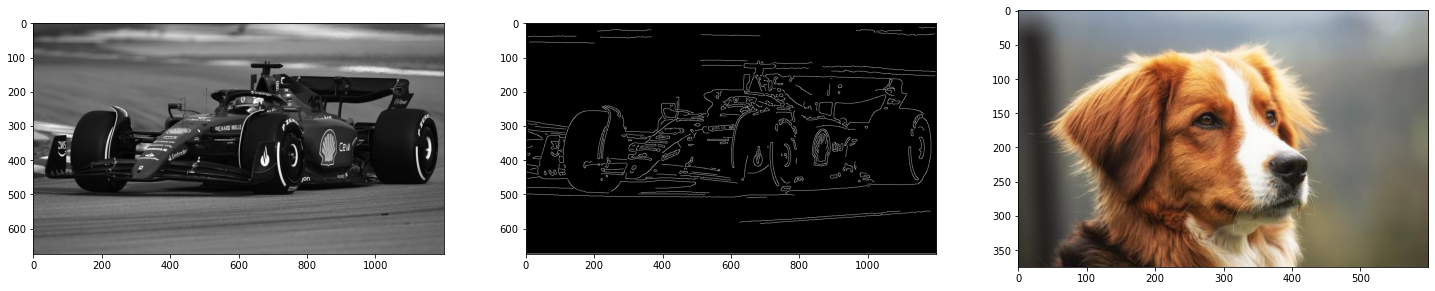

In [35]:
img_rgb = imageio.imread("ejemplo.png")/255
img_gray = rgb2yiq(imageio.imread("ferrari.png")/255)[:,:,0]
img_bin = canny(img_gray, sigma = 2)
#img_bin = canny((rgb2yiq(img_rgb)[:,:,0]),sigma=1)

fig, axes = plt.subplots(1, 3, figsize=(25,30))
axes[0].imshow(img_gray, 'gray')
axes[1].imshow(img_bin, 'gray')
axes[2].imshow(img_rgb)

In [36]:
def morph_op(img, se, fcn): 
    '''Implements a general morphologic operation.'''
    se_flip = np.flip(se, axis=[0,1])
    rk, ck = se_flip.shape
    img_pad = np.pad(img, ((rk//2, rk//2), (ck//2, ck//2)), 'edge')
    img_out = np.zeros(img.shape)
    for r,c in np.ndindex(img.shape):
        img_out[r,c] = fcn(img_pad[r:r+rk,c:c+ck][se_flip])
    return img_out

def morph_multiband(img, se, argfcn):
    '''Implements a general morphologic operation on a mutichannel image based on the first channel.'''
    se_flip = np.flip(se, axis=[0,1])
    rk, ck = se_flip.shape
    img_pad = np.pad(img, ((rk//2, rk//2), (ck//2, ck//2), (0,0)), 'edge')
    img_out = np.zeros(img.shape)
    rse, cse = np.where(se_flip)
    for r,c in np.ndindex(img.shape[:2]):
        loc = argfcn(img_pad[r:r+rk,c:c+ck,0][se_flip])
        img_out[r,c] = img_pad[r+rse[loc],c+cse[loc]]
    return img_out

def morph_color(img, se, argfcn):
    '''Applies a morphological operation to a color image based on the 
    Y-channel.
    '''
    img2 = (rgb2yiq(img)[:, :, 0])[:, :, np.newaxis]
    img2 = np.concatenate((img2, img),axis=2)
    result = morph_multiband(img2, se, argfcn)[:, :, 1:]
    return result

#-----------------------------------------

def im_dilate(img, se):
    '''Morphological dilation for binary, grayscale or RGB images.'''
    if img.ndim == 2:
        return morph_op(img, se, np.max)
    else:
        return morph_color(img, se, np.argmax)  


#def im_erosion(img, se):    
# ...


#def mediana(M):
# implementar...

def im_mediana(img, se):
    '''Morphological dilation for binary, grayscale or RGB images.'''
    if img.ndim == 2:
        return morph_op(img, se, np.median)
    else:
        return morph_color(img, se, mediana)
    
    
def borde_externo(img, se):
    return im_dilate(img,se) - img

#...


# Operaciones morfológicas

Definir los siguientes elementos estructurantes (structuring elements), para luego aplicar operaciones morfológicas. 
Los elementos estructurantes son similares a un kernel convolucional pero el tipo de dato es booleano (True o False). 

1. Box
2. Circle

Utilizando las funciones de ejemplo implementar las siguientes operaciones morfológicas, tanto para escala de grises como para RGB. Para RGB realizar la operación en base a los valores del canal Y:

Operaciones básicas (nivel 1):

1. Dilatación
2. Erosión
3. Filtro de mediana

Operaciones de suma/resta entre erosión y dilatación:

4. Borde externo (Dilatacion - imagen)
5. Borde interno (imagen - Erosión)
6. Gradiente (Dilatación - Erosión)

Operaciones concatenando dilatación y erosión (nivel 2):

7. Apertura (Erosión + Dilatación)
8. Cierre (Dilatación + Erosión)
9. Top-hat (imagen - Apertura)
10. Bottom-hat (Cierre - imagen)

Operaciones concatenando cierre y apertura (nivel 3):

11. OC (Open + Close)
12. CO (Close + Open)

EXTRA:

13. Segmentación del iris del ojo
14. Extracción de texto

### BOX y CIRCLE

In [22]:
N=3
se_box = np.ones((N,N), dtype=bool)
#se_box = np.ones((3,3))
#se_box = se_box > 0
print(se_box)


se_circle = np.array([[0,1,0],
                      [1,1,1],
                      [0,1,0]])
se_circle = se_circle > 0
print(se_circle)




[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[False  True False]
 [ True  True  True]
 [False  True False]]


### DILATACION

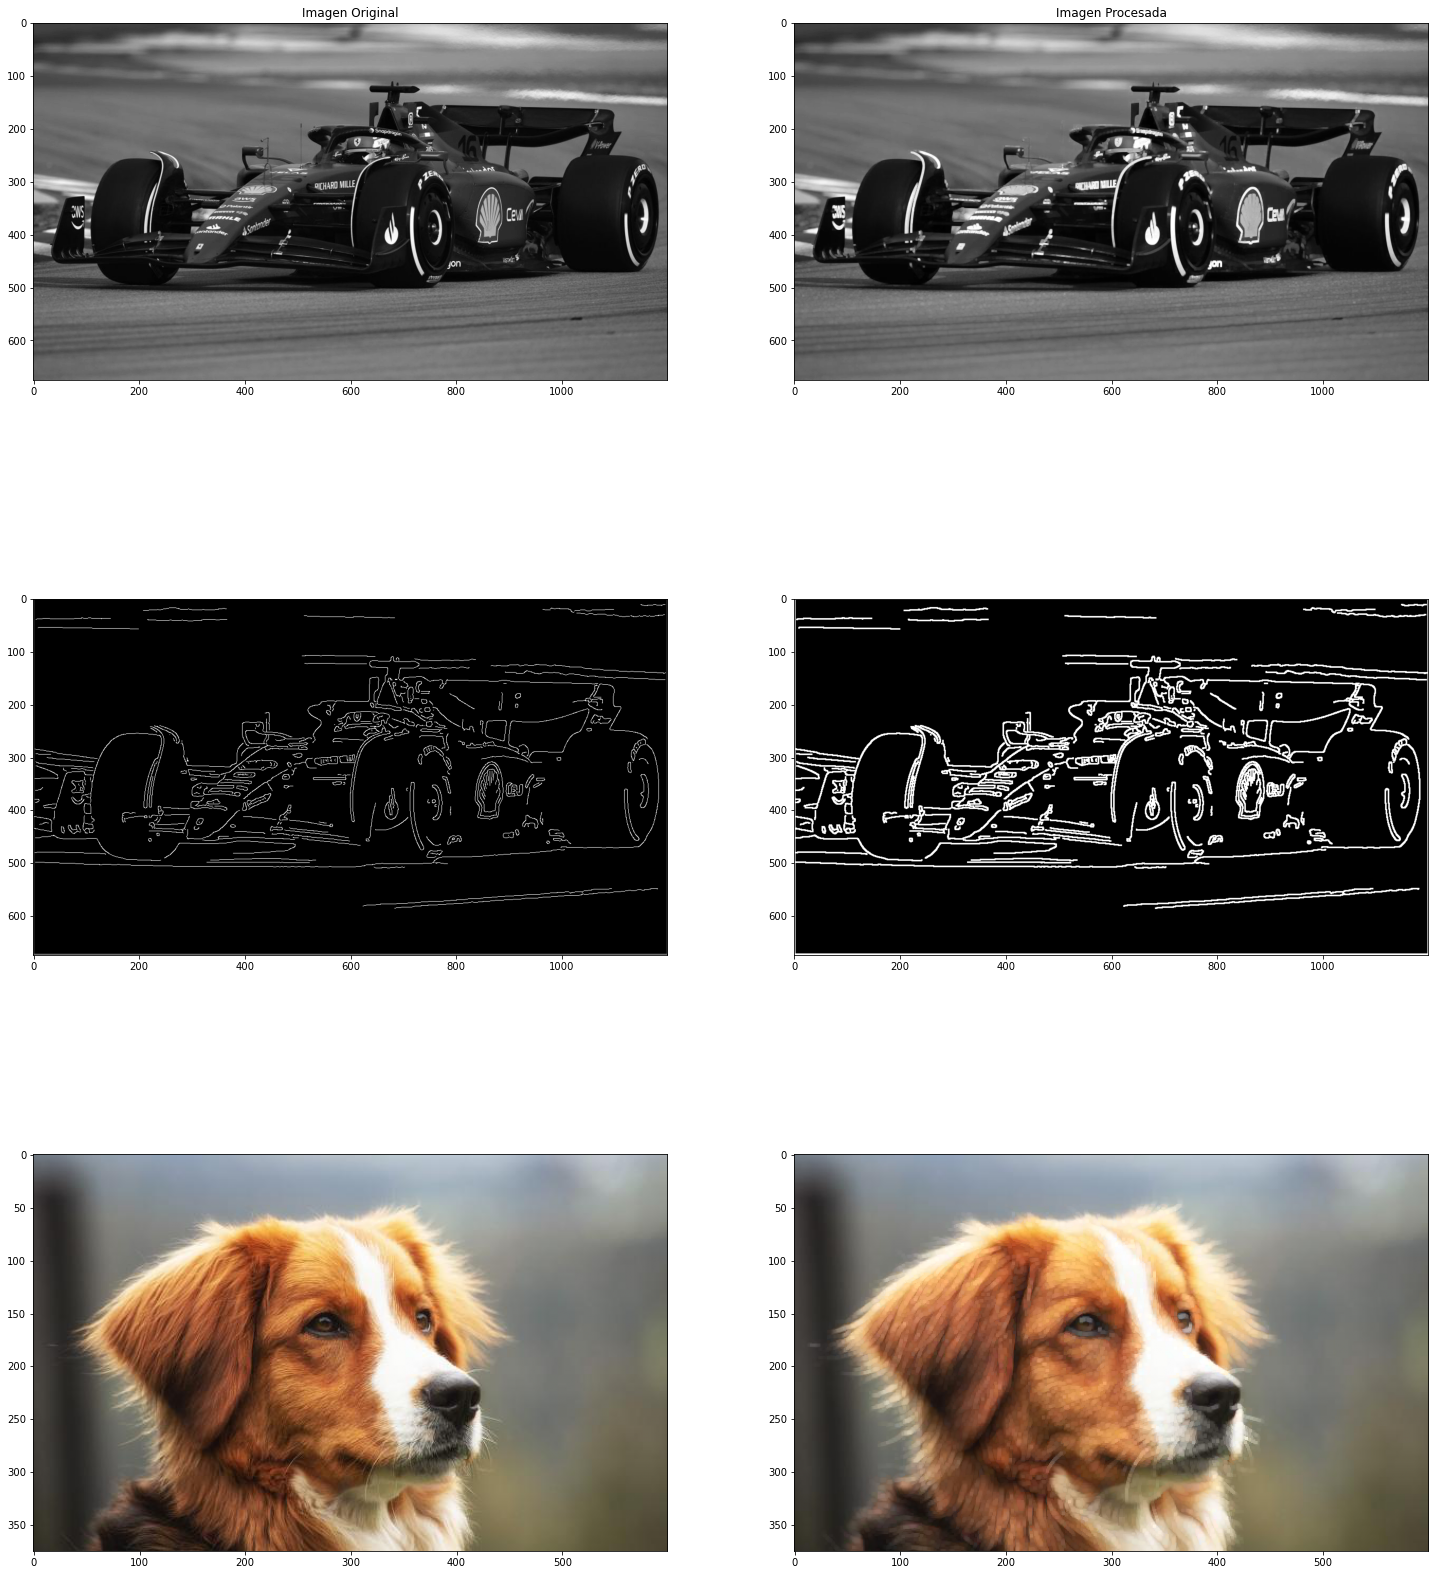

In [43]:
se = se_box

fig, axes = plt.subplots(3, 2, figsize=(25,30))
axes[0,0].set_title('Imagen Original')
axes[0,1].set_title('Imagen Procesada')
axes[0,0].imshow(img_gray, 'gray')
axes[0,1].imshow(im_dilate(img_gray,se), 'gray')
axes[1,0].imshow(img_bin, 'gray')
axes[1,1].imshow(im_dilate(img_bin,se), 'gray')
axes[2,0].imshow(img_rgb)
axes[2,1].imshow(im_dilate(img_rgb,se))